# **EYE INFECTION DATASET**






## **DATA ACQUISITION**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ed=pd.read_csv('Eye_Dataset.csv',on_bad_lines='skip') 
ed.head()


,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK
0,15863,46,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'
1,15863,46,MALE',15-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Satisfied '
2,15864,42,FEMALE',01-JUL-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Treatment Going On'
3,15864,42,FEMALE',10-AUG-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Satisfied '
4,15865,9,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'


In [ ]:
ed['LB']=ed['STR']

In [ ]:
ed['STR']=ed['STR'].replace("Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop'")

In [ ]:
ed['STR']=ed['STR'].replace(["Inj: Avastin ,'Navanac Eye Drop'","Inj: Avastin ,Navanac Eye Drop'","Inj: Avastin,Navanac Eye Drop' '"],"Inj: Avastin,Navanac Eye Drop'")

In [ ]:
ed['STR']=ed['STR'].replace("Inj: Avastin ,'Tab: AZM,Navanac Eye Drop',","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop'")

In [ ]:
ed['LB'].replace(["Navanac Eye Drop'" , "Anti-Glaucoma Medication'","Tab: AZM,Navanac Eye Drop'","Tab: Vitamin A'","Corneal Transplantation '"],1,inplace=True)

In [ ]:
ed['LB'].replace(["Vitractomy Surgery'" , "Repair  Surgery'","Yag Laser Peripherial Iridotomy'","Yag LaserCapsulotomy'","Anti-Glaucoma Medication'","Inj: Avastin,Navanac Eye Drop'","Neurological Surgery'","Inj: Avastin,Argon Laser'","Inj: Avastin ,'Navanac Eye Drop'","Inj: Avastin ,Navanac Eye Drop'","Laser Peripherial Iridotomy'","Argon Laser '","Trebyculectomy'","Inj: Avastin,Navanac Eye Drop' '","Inj: Avastin,Argon Laser '","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop',","Trebyculectomy,Anti-Glaucoma Medication'","Inj: Avastin '","Inj: Avastin '","Neurological Disorder'"],0,inplace=True)

In [ ]:
ed.shape

(835, 10)

**DATA PREPROCESSING**

In [ ]:
ed=ed.replace('?', np.NaN)

In [ ]:
pd.isna(ed).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     1
LB      0
dtype: int64

In [ ]:
for column in ed.columns:
    if ed[column].dtype == 'object':
        ed[column].fillna(ed[column].mode()[0], inplace=True)

In [ ]:
pd.isna(ed).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     0
LB      0
dtype: int64

<Axes: >

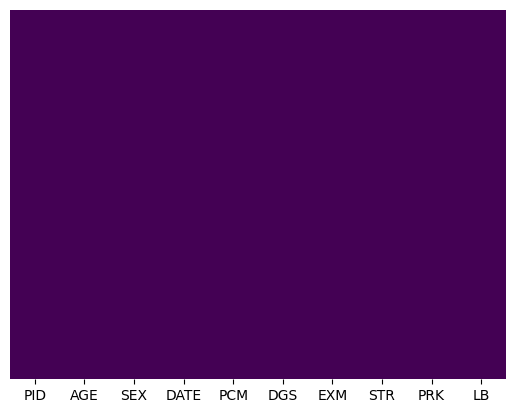

In [ ]:

sns.heatmap(ed.isnull(),yticklabels=False,cbar=False,cmap='viridis')


**DATA PREPERATION**

In [ ]:
ed['SEX'].value_counts() 

MALE'      493
FEMALE'    342
Name: SEX, dtype: int64

Text(0, 0.5, 'Count')

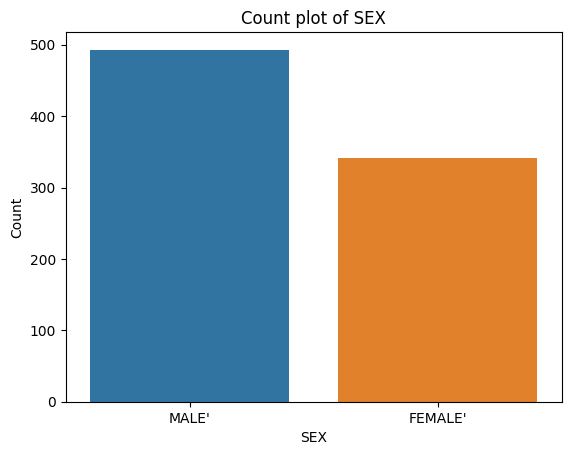

In [ ]:
sns.countplot(x=ed['SEX'])
plt.title('Count plot of SEX')
plt.xlabel('SEX')
plt.ylabel('Count')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = le.fit_transform(ed['SEX'])
ed['SEX']=df


In [ ]:
ed['DATE'].value_counts()

27-SEP-10'    23
20-JUL-10'    22
06-JUL-10'    19
30-SEP-10'    19
15-JUL-10'    18
              ..
27-JUL-10      1
07-DEC-10'     1
09-SEP-10'     1
09-SEP-10      1
2-AUG-10'      1
Name: DATE, Length: 146, dtype: int64

In [ ]:
df = le.fit_transform(ed['DATE'])
ed['DATE']=df

In [ ]:
ed['PCM'].value_counts()

Blured Vision '                         396
Raised Intra Occular Pressure '         149
sudden loss of vision '                 135
Decrease Vision '                        80
Loss Of Peripherial Field of Vision'     66
Decrease Vision in Both Eye'              9
Name: PCM, dtype: int64

In [ ]:
df = le.fit_transform(ed['PCM'])
ed['PCM']=df

In [ ]:
ed['DGS'].value_counts()

Vitrous Haemoriage'                  246
Retinal Detetchment '                180
Angle Occular Glacoma'               148
Postirior Capsular Opacification'     48
Glaucoma'                             45
Diabetic Retinopathy'                 39
CSCR'                                 25
CRVO'                                 22
Macular Oedema'                       21
Neurological Disorder'                21
Temporal Defect'                      16
Retinitis Pigmentosa '                14
Keretoconrus '                         9
Pigmentosa'                            1
Name: DGS, dtype: int64

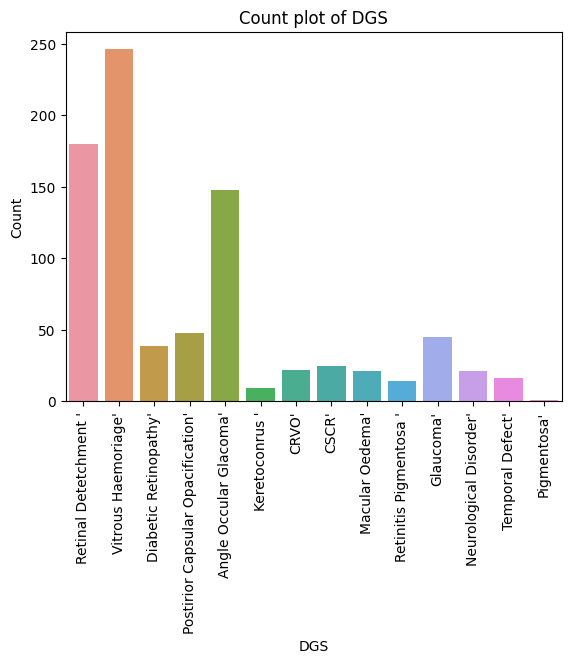

In [ ]:
sns.countplot(x=ed['DGS'])
plt.title('Count plot of DGS')
plt.xlabel('DGS')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = le.fit_transform(ed['DGS'])
ed['DGS']=df


In [ ]:

ed['EXM'].value_counts()

B-Scan'                427
Yag Laser'             192
FFA'                    68
Perimetry'              68
Argon Laser Grid'       29
Argon Laser  PRP'       21
Argon Laser BRVO'       21
Corneal Topography'      9
Name: EXM, dtype: int64

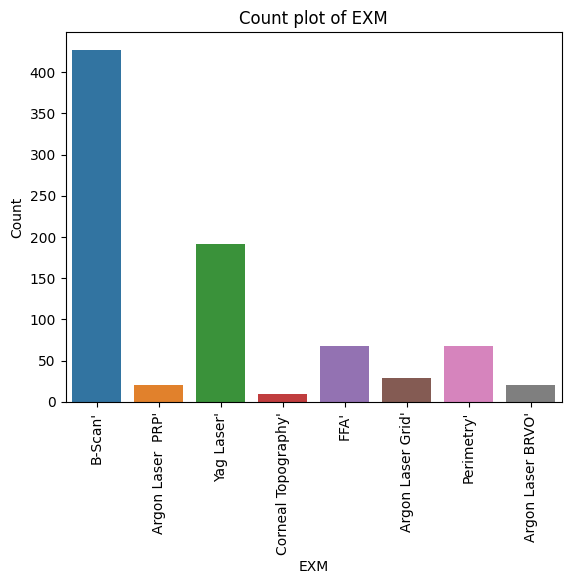

In [ ]:
sns.countplot(x=ed['EXM'])
plt.title('Count plot of EXM')
plt.xlabel('EXM')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = le.fit_transform(ed['EXM'])
ed['EXM']=df


In [ ]:
ed['STR'].value_counts()

Vitractomy Surgery'                          254
Repair  Surgery'                             173
Yag Laser Peripherial Iridotomy'             145
Navanac Eye Drop'                             87
Yag LaserCapsulotomy'                         47
Anti-Glaucoma Medication'                     45
Neurological Surgery'                         18
Tab: AZM,Navanac Eye Drop'                    15
Tab: Vitamin A'                               15
Inj: Avastin,Navanac Eye Drop'                14
Corneal Transplantation '                      9
Inj: Avastin,Argon Laser '                     3
Inj: Avastin ,'Tab: AZM,Navanac Eye Drop'      2
Laser Peripherial Iridotomy'                   2
Trebyculectomy'                                1
Argon Laser '                                  1
Inj: Avastin,Argon Laser'                      1
Trebyculectomy,Anti-Glaucoma Medication'       1
Inj: Avastin '                                 1
Neurological Disorder'                         1
Name: STR, dtype: in

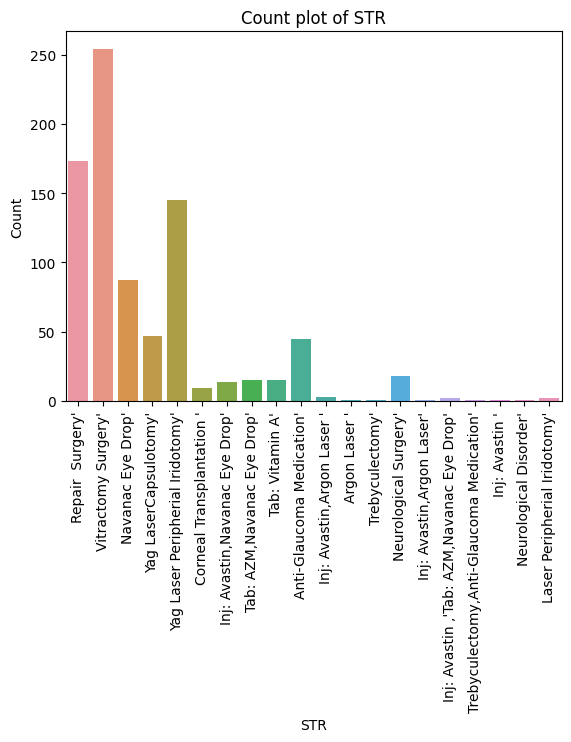

In [ ]:
sns.countplot(x=ed['STR'])
plt.title('Count plot of STR')
plt.xlabel('STR')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = le.fit_transform(ed['STR'])
ed['STR']=df


In [ ]:
ed['PRK'].value_counts()

Satisfied '                        426
Treatment Going On'                178
UnSatisfied '                      139
Leave Against Medical Advise'       84
Leave Against Medical Record  '      8
Name: PRK, dtype: int64

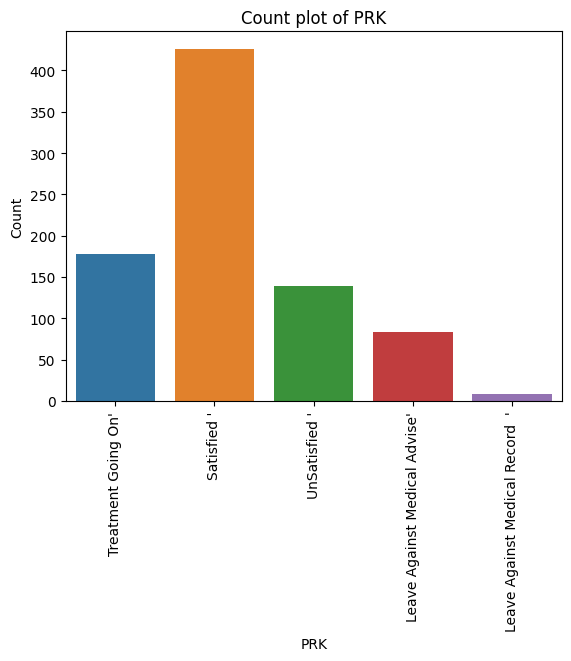

In [ ]:
sns.countplot(x=ed['PRK'])
plt.title('Count plot of PRK')
plt.xlabel('PRK')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:

df = le.fit_transform(ed['PRK'])
ed['PRK']=df


In [ ]:
ed.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,1,1,5,10,3,12,3,0
1,15863,46,1,65,5,10,3,12,2,0
2,15864,42,0,1,5,13,3,17,3,0
3,15864,42,0,42,5,13,3,17,2,0
4,15865,9,1,1,5,10,3,12,3,0


In [ ]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PID     835 non-null    int64
 1   AGE     835 non-null    int64
 2   SEX     835 non-null    int64
 3   DATE    835 non-null    int64
 4   PCM     835 non-null    int64
 5   DGS     835 non-null    int64
 6   EXM     835 non-null    int64
 7   STR     835 non-null    int64
 8   PRK     835 non-null    int64
 9   LB      835 non-null    int64
dtypes: int64(10)
memory usage: 65.4 KB


In [ ]:
ed.dtypes

PID     int64
AGE     int64
SEX     int64
DATE    int64
PCM     int64
DGS     int64
EXM     int64
STR     int64
PRK     int64
LB      int64
dtype: object

In [ ]:
ed.describe()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000
mean,16465.417964,44.676647,0.590419,76.504192,1.876647,7.749701,4.177246,13.759281,2.335329,0.20479
std,366.516398,20.023808,0.492051,41.704176,2.056835,4.967362,1.930994,4.954059,1.086271,0.40379
min,15863.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,16129.500000,30.000000,0.000000,42.000000,0.000000,3.000000,3.000000,12.000000,2.000000,0.00000
50%,16445.000000,50.000000,1.000000,77.000000,1.000000,10.000000,3.000000,17.000000,2.000000,0.00000
75%,16789.000000,60.000000,1.000000,111.000000,4.000000,13.000000,6.000000,17.000000,3.000000,0.00000
max,17113.000000,86.000000,1.000000,145.000000,5.000000,13.000000,7.000000,19.000000,4.000000,1.00000


**OUTLIER DETECTION AND REMOVAL**

In [ ]:
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']

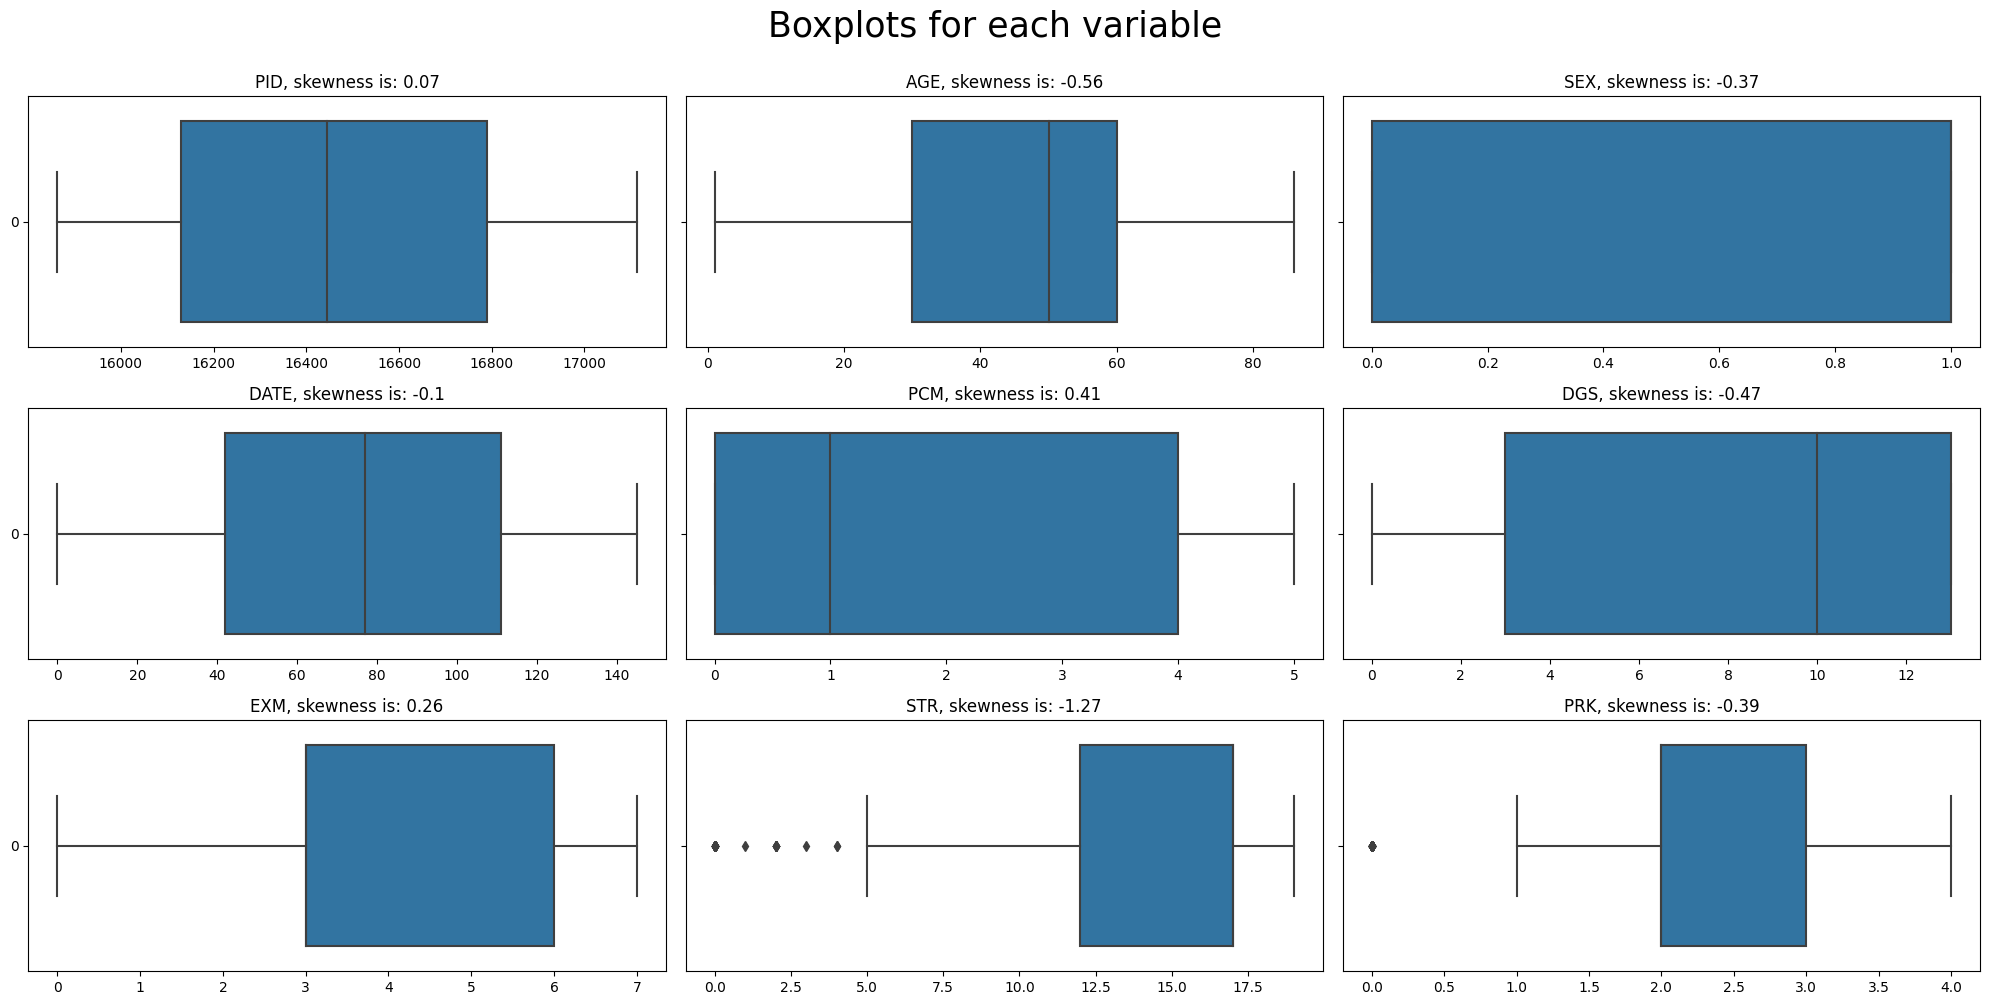

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=ed, columns_list=columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

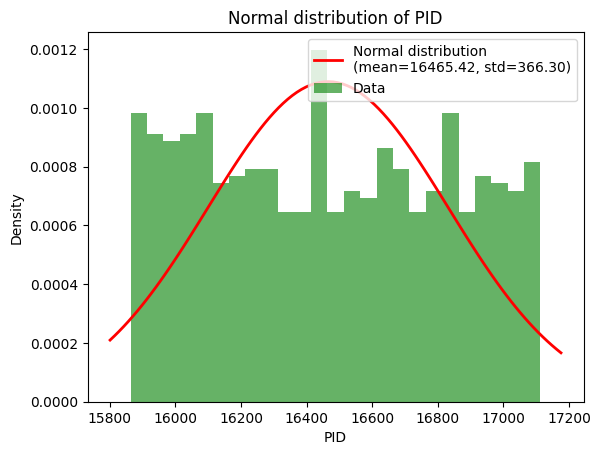

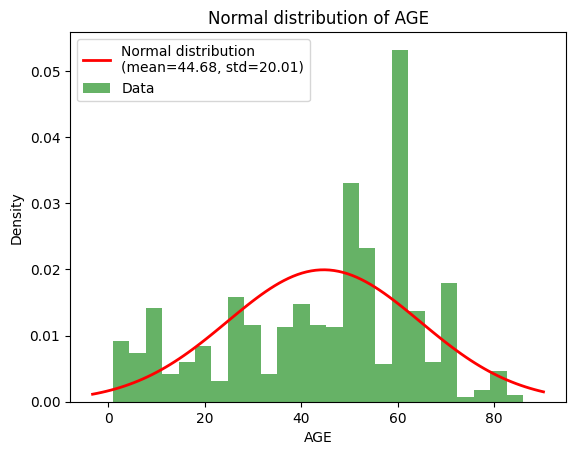

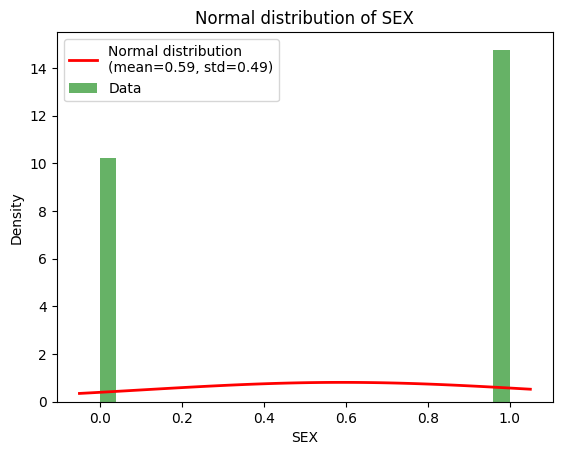

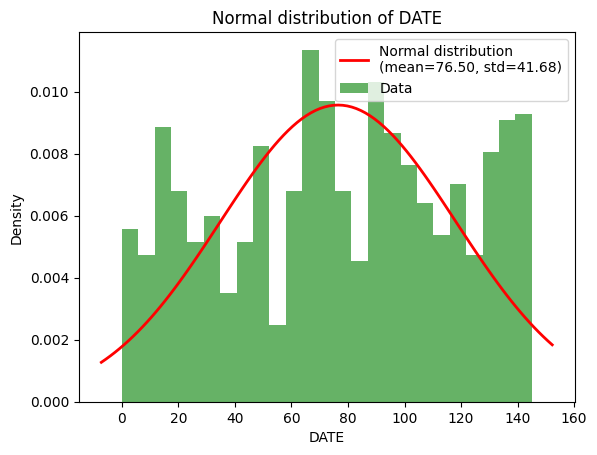

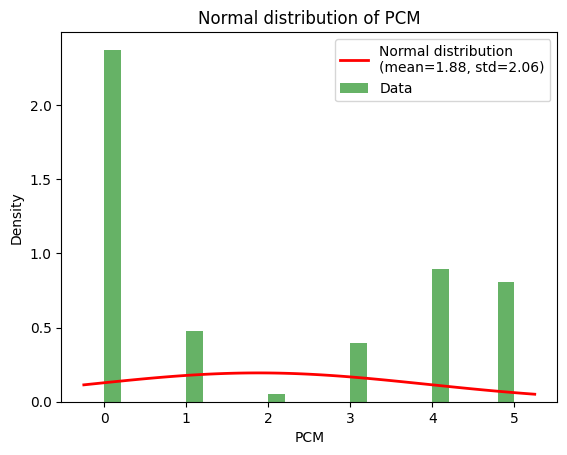

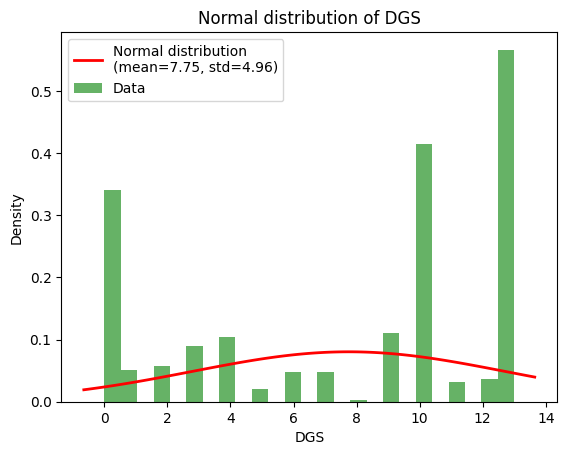

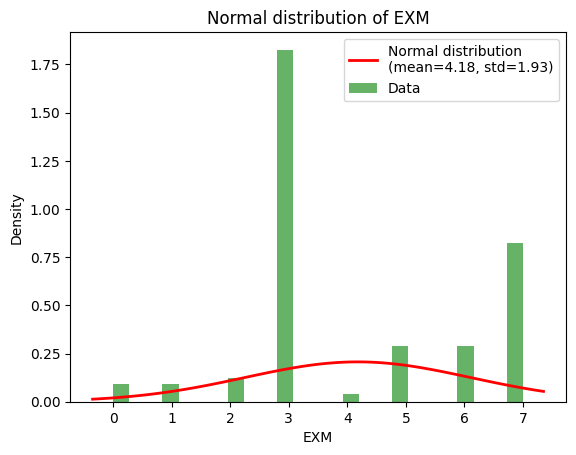

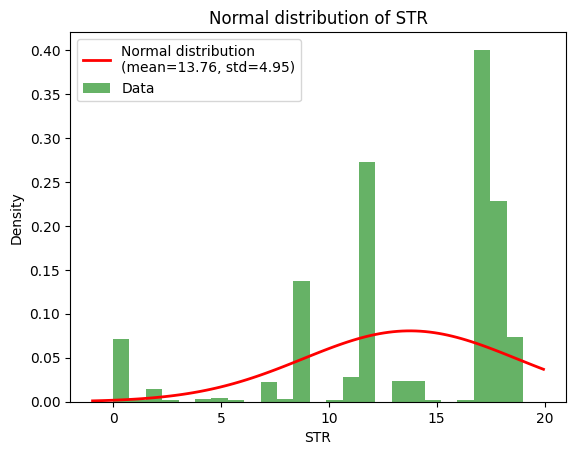

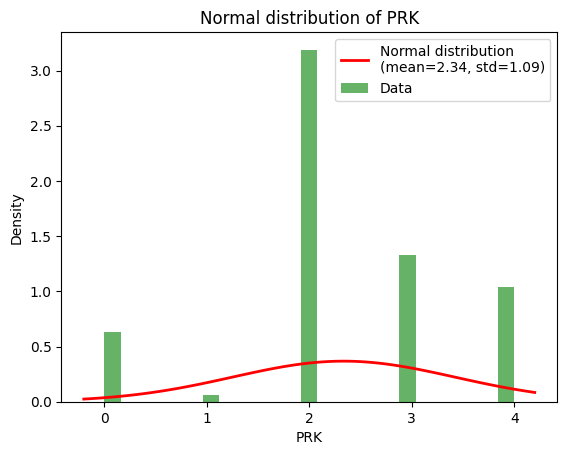

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']

# Loop over each column and plot the normal distribution curve
for column in columns:
    # Calculate mean and standard deviation
    mu, std = norm.fit(ed[column])

    # Create a histogram of the data
    plt.hist(ed[column], bins=25, density=True, alpha=0.6, color='g')

    # Create a range of x-values to use for the plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    # Calculate the corresponding y-values for the normal distribution curve
    y = norm.pdf(x, mu, std)

    # Plot the normal distribution curve
    plt.plot(x, y, 'r', linewidth=2)

    # Add a legend
    plt.legend([f'Normal distribution\n(mean={mu:.2f}, std={std:.2f})', 'Data'])

    # Add axis labels and a title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Normal distribution of {column}')

    # Display the plot
    plt.show()


In [ ]:
from scipy.stats import shapiro

columns = ['STR','PRK']

# perform Shapiro-Wilk test
for col in columns:
  stat, p = shapiro(ed)
  alpha = 0.05
  if p > alpha:
    print("The data is normally distributed")
  else:
    print("The data is not normally distributed")


The data is not normally distributed
The data is not normally distributed


In [ ]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col][z_scores > threshold] = np.nan
    df.dropna(inplace=True)
columns=['STR','PRK']
remove_outliers_zscore(ed, columns)


In [ ]:
ed.shape

(835, 10)

# **CNN STAGE-1**

In [ ]:
ed.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,1,1,5,10,3,12,3,0
1,15863,46,1,65,5,10,3,12,2,0
2,15864,42,0,1,5,13,3,17,3,0
3,15864,42,0,42,5,13,3,17,2,0
4,15865,9,1,1,5,10,3,12,3,0


In [ ]:
X=ed.iloc[:,[1,2,4,5,6,8]]
y=ed.iloc[:,9]

In [ ]:
Xdf=pd.DataFrame(X)
print(Xdf.shape)
Xdf.head()

(835, 6)


,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3


In [ ]:
y.shape

(835,)

In [ ]:
ydf=pd.DataFrame(y)
ydf.head(5)

,LB
0,0
1,0
2,0
3,0
4,0


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
import random
import tensorflow as tf

seed_value=42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print(X.shape[1], 1)

6 1


## 50-50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=5, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/5
27/27 [==============================] - 10s 23ms/step - loss: 12.3603 - accuracy: 0.1894 - val_loss: 11.8929 - val_accuracy: 0.2201
Epoch 2/5
27/27 [==============================] - 0s 11ms/step - loss: 12.3603 - accuracy: 0.1894 - val_loss: 11.8929 - val_accuracy: 0.2201
Epoch 3/5
27/27 [==============================] - 0s 12ms/step - loss: 12.3603 - accuracy: 0.1894 - val_loss: 11.8929 - val_accuracy: 0.2201
Epoch 4/5
27/27 [==============================] - 0s 9ms/step - loss: 12.3603 - accuracy: 0.1894 - val_loss: 11.8929 - val_accuracy: 0.2201
Epoch 5/5
14/14 [==============================] - 0s 4ms/step - loss: 11.8929 - accuracy: 0.2201
Test loss: 11.892945289611816
Test accuracy: 0.220095694065094


In [ ]:
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


14/14 [==============================] - 0s 3ms/step - loss: 11.8929 - accuracy: 0.2201
Test loss: 11.892945289611816
Test accuracy: 0.220095694065094


### 60-40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=5, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
32/32 [==============================] - 2s 18ms/step - loss: 0.6411 - accuracy: 0.1936 - val_loss: 0.6332 - val_accuracy: 0.2216
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6119 - accuracy: 0.1936 - val_loss: 0.6120 - val_accuracy: 0.2216
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.5894 - accuracy: 0.1936 - val_loss: 0.5955 - val_accuracy: 0.2216
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.5704 - accuracy: 0.1936 - val_loss: 0.5818 - val_accuracy: 0.2216
Epoch 5/5
11/11 [==============================] - 0s 8ms/step - loss: 0.5706 - accuracy: 0.2216
Test loss: 0.5706498026847839
Test accuracy: 0.2215568870306015


### 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=5, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
37/37 [==============================] - 2s 24ms/step - loss: 0.7590 - accuracy: 0.2003 - val_loss: 0.7300 - val_accuracy: 0.2151
Epoch 2/5
37/37 [==============================] - 0s 11ms/step - loss: 0.7081 - accuracy: 0.2003 - val_loss: 0.6896 - val_accuracy: 0.2151
Epoch 3/5
37/37 [==============================] - 0s 13ms/step - loss: 0.6692 - accuracy: 0.2003 - val_loss: 0.6574 - val_accuracy: 0.2151
Epoch 4/5
37/37 [==============================] - 0s 11ms/step - loss: 0.6372 - accuracy: 0.2003 - val_loss: 0.6319 - val_accuracy: 0.2151
Epoch 5/5
8/8 [==============================] - 0s 9ms/step - loss: 0.6117 - accuracy: 0.2151
Test loss: 0.6116572618484497
Test accuracy: 0.2151394486427307


### 80-20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=5, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
42/42 [==============================] - 2s 16ms/step - loss: 0.6064 - accuracy: 0.1991 - val_loss: 0.6008 - val_accuracy: 0.2275
Epoch 2/5
42/42 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.1991 - val_loss: 0.5869 - val_accuracy: 0.2275
Epoch 3/5
42/42 [==============================] - 0s 7ms/step - loss: 0.5600 - accuracy: 0.1991 - val_loss: 0.5762 - val_accuracy: 0.2275
Epoch 4/5
42/42 [==============================] - 0s 7ms/step - loss: 0.5442 - accuracy: 0.1991 - val_loss: 0.5675 - val_accuracy: 0.2275
Epoch 5/5
6/6 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.2275
Test loss: 0.5601544380187988
Test accuracy: 0.227544903755188


## **ANN STAGE-1**

## 50-50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
14/14 [==============================] - 2s 6ms/step - loss: 0.8007 - accuracy: 0.3309
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.7653 - accuracy: 0.3765
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.7361 - accuracy: 0.4173
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.7114 - accuracy: 0.4772
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5012
Epoch 6/10
14/14 [==============================] - 0s 8ms/step - loss: 0.6662 - accuracy: 0.5372
Epoch 7/10
14/14 [==============================] - 0s 12ms/step - loss: 0.6461 - accuracy: 0.5971
Epoch 8/10
14/14 [==============================] - 0s 8ms/step - loss: 0.6265 - accuracy: 0.6811
Epoch 9/10
14/14 [==============================] - 0s 7ms/step - loss: 0.6090 - accuracy: 0.7098
Epoch 10/10
14/14 [==============================] - 0s 2ms/step
Accuracy: 0.7535885167464115


## 60-40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
16/16 [==============================] - 1s 4ms/step - loss: 0.6977 - accuracy: 0.6248
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6427
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6527
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6707
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.6806
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6866
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.6986
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7006
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.6986
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Accuracy: 0.7155688622754491


## 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.7)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
19/19 [==============================] - 1s 4ms/step - loss: 0.7291 - accuracy: 0.5000
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.5582
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6524
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7363
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7962
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5550 - accuracy: 0.8031
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7997
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.7979
Epoch 9/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7979
Epoch 10/10
8/8 [==============================] - 0s 3ms/step
Accuracy: 0.796812749003984


## 80-20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.7)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
21/21 [==============================] - 2s 4ms/step - loss: 0.6743 - accuracy: 0.5704
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6108
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.6602
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.6901
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7320
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7440
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7485
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8084
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4861 - accuracy: 0.8084
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Accuracy: 0.7724550898203593


## **CNN STAGE-2**

In [ ]:
X=ed.iloc[:,[1,2,5,8]].values
y=ed.iloc[:,9].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 50-50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=4, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
27/27 [==============================] - 2s 20ms/step - loss: 0.6566 - accuracy: 0.1823 - val_loss: 0.6441 - val_accuracy: 0.2273
Epoch 2/5
27/27 [==============================] - 0s 8ms/step - loss: 0.6314 - accuracy: 0.1823 - val_loss: 0.6260 - val_accuracy: 0.2273
Epoch 3/5
27/27 [==============================] - 0s 10ms/step - loss: 0.6099 - accuracy: 0.1823 - val_loss: 0.6111 - val_accuracy: 0.2273
Epoch 4/5
27/27 [==============================] - 0s 12ms/step - loss: 0.5900 - accuracy: 0.1823 - val_loss: 0.6007 - val_accuracy: 0.2273
Epoch 5/5
14/14 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.2273
Test loss: 0.5901240110397339
Test accuracy: 0.22727273404598236


## 60-40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=4, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
32/32 [==============================] - 5s 51ms/step - loss: 0.6596 - accuracy: 0.1936 - val_loss: 0.6212 - val_accuracy: 0.2216
Epoch 2/5
32/32 [==============================] - 1s 21ms/step - loss: 0.6316 - accuracy: 0.1936 - val_loss: 0.6066 - val_accuracy: 0.2216
Epoch 3/5
32/32 [==============================] - 1s 20ms/step - loss: 0.6099 - accuracy: 0.1936 - val_loss: 0.5949 - val_accuracy: 0.2216
Epoch 4/5
32/32 [==============================] - 1s 17ms/step - loss: 0.5888 - accuracy: 0.1936 - val_loss: 0.5845 - val_accuracy: 0.2216
Epoch 5/5
11/11 [==============================] - 0s 5ms/step - loss: 0.5755 - accuracy: 0.2216
Test loss: 0.575546383857727
Test accuracy: 0.2215568870306015


## 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=4, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
37/37 [==============================] - 4s 31ms/step - loss: 0.6176 - accuracy: 0.2003 - val_loss: 0.5988 - val_accuracy: 0.2151
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 0.5962 - accuracy: 0.2003 - val_loss: 0.5850 - val_accuracy: 0.2151
Epoch 3/5
37/37 [==============================] - 0s 11ms/step - loss: 0.5797 - accuracy: 0.2003 - val_loss: 0.5734 - val_accuracy: 0.2151
Epoch 4/5
37/37 [==============================] - 0s 12ms/step - loss: 0.5661 - accuracy: 0.2003 - val_loss: 0.5640 - val_accuracy: 0.2151
Epoch 5/5
8/8 [==============================] - 1s 25ms/step - loss: 0.5561 - accuracy: 0.2151
Test loss: 0.5560919046401978
Test accuracy: 0.2151394486427307


## 80-20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=4, activation='sigmoid', strides=1,input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5, kernel_size=1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.save_weights('model_weights.h5')  # Save the model weights to a file
model.load_weights('model_weights.h5')  # Load the model weights from a file

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/5
42/42 [==============================] - 4s 23ms/step - loss: 0.6296 - accuracy: 0.1991 - val_loss: 0.6121 - val_accuracy: 0.2275
Epoch 2/5
42/42 [==============================] - 0s 11ms/step - loss: 0.6019 - accuracy: 0.1991 - val_loss: 0.5934 - val_accuracy: 0.2275
Epoch 3/5
42/42 [==============================] - 0s 11ms/step - loss: 0.5793 - accuracy: 0.1991 - val_loss: 0.5794 - val_accuracy: 0.2275
Epoch 4/5
42/42 [==============================] - 1s 12ms/step - loss: 0.5627 - accuracy: 0.1991 - val_loss: 0.5687 - val_accuracy: 0.2275
Epoch 5/5
6/6 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.2275
Test loss: 0.5601902008056641
Test accuracy: 0.227544903755188


## **ANN STAGE-2**

## 50-50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
14/14 [==============================] - 2s 4ms/step - loss: 0.6984 - accuracy: 0.4652
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5060
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5683
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5851
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6307
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6835
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7218
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7410
Epoch 9/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.7434
Epoch 10/10
14/14 [==============================] - 0s 2ms/step
Accuracy: 0.7511961722488039


## 60-40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
16/16 [==============================] - 3s 3ms/step - loss: 0.6643 - accuracy: 0.5788
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6108
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6367
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.6567
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6747
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5929 - accuracy: 0.6866
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.6966
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7006
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7006
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Accuracy: 0.7455089820359282


## 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
19/19 [==============================] - 1s 4ms/step - loss: 0.6830 - accuracy: 0.5805
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.6318
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6644
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6884
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.6901
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7158
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7158
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.7158
Epoch 9/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.7140
Epoch 10/10
8/8 [==============================] - 0s 2ms/step
Accuracy: 0.6892430278884463


## 80-20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=3,activation="tanh"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,batch_size=32,epochs=10)

y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Epoch 1/10
21/21 [==============================] - 2s 5ms/step - loss: 0.6717 - accuracy: 0.5734
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6587
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.7186
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.7201
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.7126
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7081
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5652 - accuracy: 0.7036
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.6991
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7036
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Accuracy: 0.7485029940119761
